# Разбор концепции проекта

#### Основная цель данного проекта - это найти два массива данных с явной взаимосвязью, </br> для того чтобы с помощью машинного обучения, </br>  провести предикативный анализ и получить предсказание будущих значений показателя </br> на основании уже имеющейся на момент анализа информации




В данном проекте будут использованы:
- методы сбора информации (парсинг)
- методы обработки информации (в т.ч. в табличной форме)
- корреляционный анализ
- регрессионный анализ (машинное обучение)

---

# Практическая реализация проекта

В последнее время выпускается много супергеройских фильмов от компании "Marvel Studios". 
Было бы интересно проанализировать бюджеты и кассовые сборы выпущенных ими фильмов, предполагая, что есть связь между ними (бюджет-сборы)...

Чтобы найти нужную нам информацию достаточно перейти на сайт Wikipedia.org, где есть таблица с нужной информацией (см. фото).</br> 
Осталось достать только необходимую нам часть со страницы сайта и обработать её для дальнейшего анализа.</br>
На фото выделены столбцы и наполнение, которое представляет для нас ценность

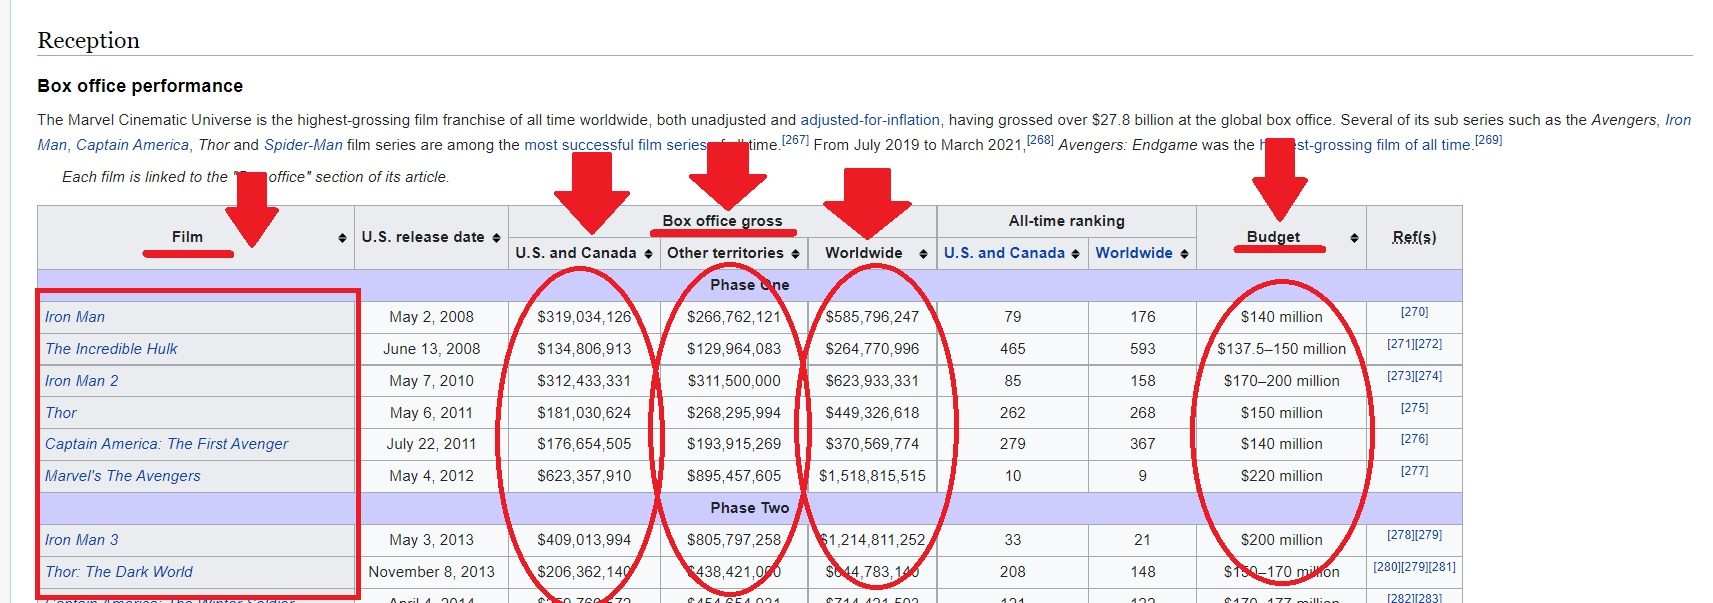

## ЗАГРУЖАЕМ НЕОБХОДИМЫЕ БИБЛИОТЕКИ И ПРИСТУПАЕМ К ПАРСИНГУ

In [118]:
# ЗАГРУЗИМ ВСЕ БИБЛИОТЕКИ

import requests 
from bs4 import BeautifulSoup
# from time import sleep
import pandas as pd
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model

In [119]:
# ЗАГРУЗИМ И ПРОВЕРИМ ПРАВИЛЬНО ЛИ НАШЛАСЬ ТАБЛИЦА (ДЛЯ ЭТОГО ИЩЕМ ПО ИМЕНИ "Box office performance")

tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films", match="Box office performance")

In [120]:
# ВИДИМ, ЧТО ТАБЛИЦА ВЫГРУЗИЛАСЬ ВЕРНО, НО НЕОБХОДИМО ЕЁ ОБРАБОТАТЬ

tables[0].head(2)

Film U.S. release date Box office gross                    \
                  Film U.S. release date  U.S. and Canada Other territories   
             Phase One         Phase One        Phase One         Phase One   
0             Iron Man       May 2, 2008     $319,034,126      $266,762,121   
1  The Incredible Hulk     June 13, 2008     $134,806,913      $129,964,083   

                All-time ranking                        Budget      Ref(s)  
      Worldwide  U.S. and Canada Worldwide              Budget      Ref(s)  
      Phase One        Phase One Phase One           Phase One   Phase One  
0  $585,796,247               79       176        $140 million       [270]  
1  $264,770,996              465       593  $137.5–150 million  [271][272]

In [121]:
# СОХРАНЯЕМ ТАБЛИЦУ В ПЕРЕМЕННУЮ

df_tables = tables[0]
df_tables

Film  U.S. release date  \
                                           Film  U.S. release date   
                                      Phase One          Phase One   
0                                      Iron Man        May 2, 2008   
1                           The Incredible Hulk      June 13, 2008   
2                                    Iron Man 2        May 7, 2010   
3                                          Thor        May 6, 2011   
4            Captain America: The First Avenger      July 22, 2011   
5                         Marvel's The Avengers        May 4, 2012   
6                                     Phase Two          Phase Two   
7                                    Iron Man 3        May 3, 2013   
8                          Thor: The Dark World   November 8, 2013   
9           Captain America: The Winter Soldier      April 4, 2014   
10                      Guardians of the Galaxy     August 1, 2014   
11                      Avengers: Age of Ultron        May 1, 2015   
12                                      Ant-Man      July 17, 2015   
13                                  Phase Three        Phase Three   
14                   Captain America: Civil War        May 6, 2016   
15                               Doctor Strange   November 4, 2016   
16               Guardians of the Galaxy Vol. 2        May 5, 2017   
17                       Spider-Man: Homecoming       July 7, 2017   
18                               Thor: Ragnarok   November 3, 2017   
19                                Black Panther  February 16, 2018   
20                       Avengers: Infinity War     April 27, 2018   
21                         Ant-Man and the Wasp       July 6, 2018   
22                               Captain Marvel      March 8, 2019   
23                            Avengers: Endgame     April 26, 2019   
24                    Spider-Man: Far From Home       July 2, 2019   
25                                   Phase Four         Phase Four   
26                                  Black Widow       July 9, 2021   
27    Shang-Chi and the Legend of the Ten Rings  September 3, 2021   
28                                     Eternals   November 5, 2021   
29                      Spider-Man: No Way Home  December 17, 2021   
30  Doctor Strange in the Multiverse of Madness        May 6, 2022   
31                       Thor: Love and Thunder       July 8, 2022   
32               Black Panther: Wakanda Forever  November 11, 2022   
33                                        Total              Total   

   Box office gross                                    All-time ranking  \
    U.S. and Canada Other territories        Worldwide  U.S. and Canada   
          Phase One         Phase One        Phase One        Phase One   
0      $319,034,126      $266,762,121     $585,796,247               79   
1      $134,806,913      $129,964,083     $264,770,996              465   
2      $312,433,331      $311,500,000     $623,933,331               85   
3      $181,030,624      $268,295,994     $449,326,618              262   
4      $176,654,505      $193,915,269     $370,569,774              279   
5      $623,357,910      $895,457,605   $1,518,815,515               10   
6         Phase Two         Phase Two        Phase Two        Phase Two   
7      $409,013,994      $805,797,258   $1,214,811,252               33   
8      $206,362,140      $438,421,000     $644,783,140              208   
9      $259,766,572      $454,654,931     $714,421,503              121   
10     $333,718,600      $439,631,547     $773,350,147               68   
11     $459,005,868      $943,800,000   $1,402,805,868               21   
12     $180,202,163      $339,109,802     $519,311,965              265   
13      Phase Three       Phase Three      Phase Three      Phase Three   
14     $408,084,349      $745,211,944   $1,153,296,293               34   
15     $232,641,920      $445,076,475     $677,718,395              156   
16     $389,813,101      $4

In [122]:
# УДАЛЯЕМ ЛИШНИЕ СТРОКИ И СТОБЦЫ

df_tables.drop(axis=0, index=[6,13,25,33], inplace=True)
df_tables.drop([('U.S. release date', 'U.S. release date', 'Phase One'),('All-time ranking',   'U.S. and Canada', 'Phase One'),
( 'All-time ranking',         'Worldwide', 'Phase One'),(           'Ref(s)',            'Ref(s)', 'Phase One')], axis=1, inplace=True)

In [123]:
# ПРОВЕРЯЕМ ВСЁ ЛИ ВЕРНО УДАЛИЛОСЬ

df_tables

Film Box office gross  \
                                           Film  U.S. and Canada   
                                      Phase One        Phase One   
0                                      Iron Man     $319,034,126   
1                           The Incredible Hulk     $134,806,913   
2                                    Iron Man 2     $312,433,331   
3                                          Thor     $181,030,624   
4            Captain America: The First Avenger     $176,654,505   
5                         Marvel's The Avengers     $623,357,910   
7                                    Iron Man 3     $409,013,994   
8                          Thor: The Dark World     $206,362,140   
9           Captain America: The Winter Soldier     $259,766,572   
10                      Guardians of the Galaxy     $333,718,600   
11                      Avengers: Age of Ultron     $459,005,868   
12                                      Ant-Man     $180,202,163   
14                   Captain America: Civil War     $408,084,349   
15                               Doctor Strange     $232,641,920   
16               Guardians of the Galaxy Vol. 2     $389,813,101   
17                       Spider-Man: Homecoming     $334,201,140   
18                               Thor: Ragnarok     $315,058,289   
19                                Black Panther     $700,426,566   
20                       Avengers: Infinity War     $678,815,482   
21                         Ant-Man and the Wasp     $216,648,740   
22                               Captain Marvel     $426,829,839   
23                            Avengers: Endgame     $858,373,000   
24                    Spider-Man: Far From Home     $390,532,085   
26                                  Black Widow     $183,651,655   
27    Shang-Chi and the Legend of the Ten Rings     $224,543,292   
28                                     Eternals     $164,870,234   
29                      Spider-Man: No Way Home     $814,115,070   
30  Doctor Strange in the Multiverse of Madness     $411,331,607   
31                       Thor: Love and Thunder     $343,256,830   
32               Black Panther: Wakanda Forever     $287,992,647   

                                                   Budget  
   Other territories        Worldwide              Budget  
           Phase One        Phase One           Phase One  
0       $266,762,121     $585,796,247        $140 million  
1       $129,964,083     $264,770,996  $137.5–150 million  
2       $311,500,000     $623,933,331    $170–200 million  
3       $268,295,994     $449,326,618        $150 million  
4       $193,915,269     $370,569,774        $140 million  
5       $895,457,605   $1,518,815,515        $220 million  
7       $805,797,258   $1,214,811,252        $200 million  
8       $438,421,000     $644,783,140    $150–170 million  
9       $454,654,931     $714,421,503    $170–177 million  
10      $439,631,547     $773,350,147        $170 million  
11      $943,800,000   $1,402,805,868    $250–444 million  
12      $339,109,802     $519,311,965        $130 million  
14      $745,211,944   $1,153,296,293        $250 million  
15      $445,076,475     $677,718,395        $165 million  
16      $473,942,950     $863,756,051        $200 million  
17      $545,965,784     $880,166,924        $175 million  
18      $538,918,837     $853,977,126        $180 million  
19      $646,853,595   $1,347,280,161        $200 million  
20    $1,369,544,272   $2,048,359,754    $325–400 million  
21      $406,025,399     $622,674,139        $162 million  
22      $701,445,424   $1,128,275,263    $150–175 million  
23    $1,939,427,564   $2,797,800,564    $356–400 million  
24      $741,395,911   $1,131,927,996        $160 million  
26      $196,100,000  $379,751,655[d]        $200 million  
27      $207,700,000     $432,243,292    $150–200 million  
28      $237,194,665     $402,064,899        $200 million  
29    $1,102,778,574   $1,916,893,644        $200 million 

In [124]:
# УДАЛЯЕМ ЛИШНИЕ ПОДУРОВНИ В НАЗВАНИЯХ СТОЛБЦОВ

df_tables.columns = df_tables.columns.droplevel(-1)

In [125]:
# ЕЩЁ РАЗ, ЧТОБЫ УДАЛИТЬ ВТОРОЙ ПОДУРОВЕНЬ

df_tables.columns = df_tables.columns.droplevel(-1)

In [126]:
# ПРОВЕРЯЕМ

df_tables.head(2)

,Film,Box office gross,Box office gross,Box office gross,Budget
0,Iron Man,"$319,034,126","$266,762,121","$585,796,247",$140 million
1,The Incredible Hulk,"$134,806,913","$129,964,083","$264,770,996",$137.5–150 million


In [127]:
# МЕНЯЕМ НАЗВАНИЯ СТОЛБЦОВ

df_tables.set_axis(['Название фильма', 'В США и Канаде', 
                    'За границей', 'Во всём мире', 'Бюджет'], axis=1, inplace=True)
df_tables.head(2)

,Название фильма,В США и Канаде,За границей,Во всём мире,Бюджет
0,Iron Man,"$319,034,126","$266,762,121","$585,796,247",$140 million
1,The Incredible Hulk,"$134,806,913","$129,964,083","$264,770,996",$137.5–150 million


In [128]:
# НА ЭТОМ ЭТАПЕ НУЖНО БОЛЕЕ ПОДРОБНО ПРОЙТИСЬ ПО НАПОЛНЕНИЮ ТАБЛИЦЫ
# УДАЛИТЬ СИМВОЛ "$", СЛОВА "million", лишние запятые, отредактировать показатели бюджета и т.п.
# ЭТО СЛОЖНЫЙ ЭТАП И НЕОБХОДИМО ДЕЛАТЬ ЕГО АККУРАТНО И ЧИСТО :D

df_tables['В США и Канаде'] = df_tables['В США и Канаде'].str.replace('$','',regex=False)
df_tables['За границей'] = df_tables['За границей'].str.replace('$','',regex=False)
df_tables['Во всём мире'] = df_tables['Во всём мире'].str.replace('$','',regex=False)
df_tables['Бюджет'] = df_tables['Бюджет'].str.replace('$','',regex=False)
df_tables['Бюджет'] = df_tables['Бюджет'].str.replace(r'\smillion','',regex=True)
df_tables['Бюджет'] = df_tables['Бюджет'].str.replace(r'–\d{3}|\.\d','',regex=True)
df_tables['В США и Канаде'] = df_tables['В США и Канаде'].str.replace(',','',regex=False)
df_tables['За границей'] = df_tables['За границей'].str.replace(',','',regex=False)
df_tables['Во всём мире'] = df_tables['Во всём мире'].str.replace(',','',regex=False)
df_tables['Во всём мире'] = df_tables['Во всём мире'].str.replace(r'\[d\]','',regex=True)

In [129]:
# ПРОВЕРЯЕМ РЕЗУЛЬТАТ - ВСЁ СУПЕР!

df_tables

,Название фильма,В США и Канаде,За границей,Во всём мире,Бюджет
0,Iron Man,319034126,266762121,585796247,140
1,The Incredible Hulk,134806913,129964083,264770996,137
2,Iron Man 2,312433331,311500000,623933331,170
3,Thor,181030624,268295994,449326618,150
4,Captain America: The First Avenger,176654505,193915269,370569774,140
5,Marvel's The Avengers,623357910,895457605,1518815515,220
7,Iron Man 3,409013994,805797258,1214811252,200
8,Thor: The Dark World,206362140,438421000,644783140,150
9,Captain America: The Winter Soldier,259766572,454654931,714421503,170
10,Guardians of the Galaxy,333718600,439631547,773350147,170


<div class="alert alert-block alert-danger">
Видим, что "Бюджет" должен быть в миллионах. Очевидно, что надо этот момент откорректировать!
</div>

In [130]:
# ИЗМЕНЯЕМ ФОРМАТ СТОЛБЦОВ, ГДЕ ФИГУРИРУЮТ ЧИСЛА

df_tables[['В США и Канаде', 'За границей','Во всём мире','Бюджет']] = df_tables[['В США и Канаде', 'За границей', 
                                                                            'Во всём мире','Бюджет']].astype('Int64')

In [131]:
# ПРОВЕРЯЕМ

df_tables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 32
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Название фильма  30 non-null     object
 1   В США и Канаде   30 non-null     Int64 
 2   За границей      30 non-null     Int64 
 3   Во всём мире     30 non-null     Int64 
 4   Бюджет           30 non-null     Int64 
dtypes: Int64(4), object(1)
memory usage: 1.5+ KB


In [132]:
# ДОБАВИМ ЛИМОНЫ В БЮДЖЕТ :P

df_tables["Бюджет"] = df_tables["Бюджет"] * 1_000_000

In [133]:
# ПРОВЕРЯЕМ - ВСЁ ОТЛИЧНО!

df_tables

,Название фильма,В США и Канаде,За границей,Во всём мире,Бюджет
0,Iron Man,319034126,266762121,585796247,140000000
1,The Incredible Hulk,134806913,129964083,264770996,137000000
2,Iron Man 2,312433331,311500000,623933331,170000000
3,Thor,181030624,268295994,449326618,150000000
4,Captain America: The First Avenger,176654505,193915269,370569774,140000000
5,Marvel's The Avengers,623357910,895457605,1518815515,220000000
7,Iron Man 3,409013994,805797258,1214811252,200000000
8,Thor: The Dark World,206362140,438421000,644783140,150000000
9,Captain America: The Winter Soldier,259766572,454654931,714421503,170000000
10,Guardians of the Galaxy,333718600,439631547,773350147,170000000


#### ПАРСИНГ И ПОДГОТОВКА ДАТАСЕТА ЗАВЕРШЕНА
---

## СЛЕДУЮЩИЙ ЭТАП - КОРРЕЛЯЦИОННЫЙ АНАЛИЗ 

In [134]:
# ПРОВЕРИМ ВЗАИМОСВЯЗЬ МЕЖДУ НАШИМИ ДАННЫМИ

df_tables.corr().T.round(2)

,В США и Канаде,За границей,Во всём мире,Бюджет
В США и Канаде,1.00,0.88,0.95,0.68
За границей,0.88,1.00,0.99,0.76
Во всём мире,0.95,0.99,1.00,0.75
Бюджет,0.68,0.76,0.75,1.00


<AxesSubplot:>

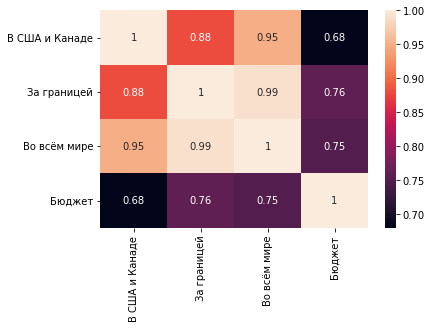

In [135]:
# ПРЕОБРАЗУЕМ РЕЗУЛЬТАТ В ГРАФИЧЕСКИЙ ВИД, ДЛЯ НАГЛЯДНОСТИ

sns.heatmap(data=df_tables.corr().round(2), annot=True)

#### Как можно увидеть, корреляция достаточно высокая </br> Поэтому проведение регрессионного анализа и предсказания будущих сборов - целесообразно
---

## СЛЕДУЮЩИЙ ЭТАП - РЕГРЕССИОННЫЙ АНАЛИЗ 

Text(0, 0.5, 'Сборы')

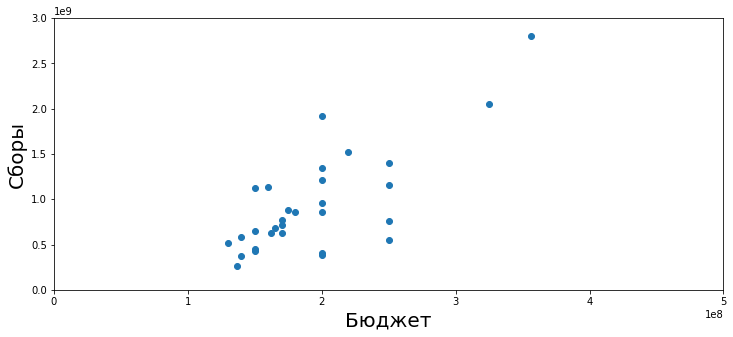

In [136]:
# ПОСТРОИМ ГРАФИК, ПОКАЗЫВАЮЩИЙ ВЗЯИМОСВЯЗЬ БЮДЖЕТА И СБОРОВ

plt.figure(figsize=(12,5))
plt.scatter(df_tables["Бюджет"], df_tables["Во всём мире"])
plt.xlim(0, 500_000_000)
plt.ylim(0, 3_000_000_000)
plt.xlabel("Бюджет", fontsize=20)
plt.ylabel("Сборы", fontsize=20)

In [137]:
# СТРОИМ РЕГРЕССИОННУЮ МОДЕЛЬ 

model = linear_model.LinearRegression()

In [138]:
# ОБОЗНАЧАЕМ ВСЕ ПЕРЕМЕННЫЕ

X = df_tables[["Бюджет"]].values
y = df_tables["Во всём мире"]

In [139]:
# РЕАЛИЗУЕМ МОДЕЛЬ

model.fit(X, y)

LinearRegression()

In [140]:
#РАСЧИТАЕМ КОЭФФИЦИЕНТЫ И ОЦЕНИМ ДИСПЕРСИЮ МОДЕЛИ

#угловой коэффициент (slope) означает, что предсказанный ответ возрастает до значения "..." при x, увеличенным на единицу.
print('Коэффициент признака:', model.coef_)  

#свободный член (отрезок, intercept) показывает, ответ "..." при x, равном нулю.
print('Intercept:', model.intercept_)  

#Коофицент детерминации, показывает точность модели
print('Коофицент детерминации:', model.score(X,y))

Коэффициент признака: [7.99549054]
Intercept: -613065535.7471135
Коофицент детерминации: 0.5672114637655989


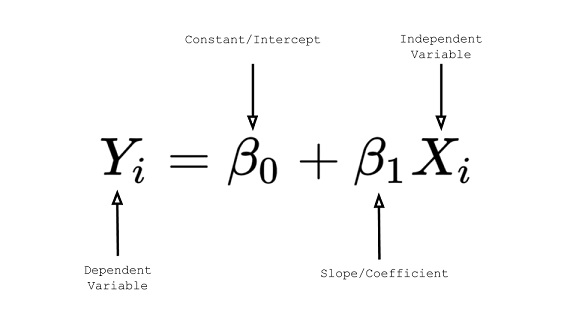

#### МОДЕЛЬ ГОТОВА, ПОЭТОМУ ТЕПЕРЬ МОЖНО ПРЕДСКАЗАТЬ ПОКАЗАТЕЛЬ СБОРОВ 

Text(0, 0.5, 'Сборы (в млрд.долл.)')

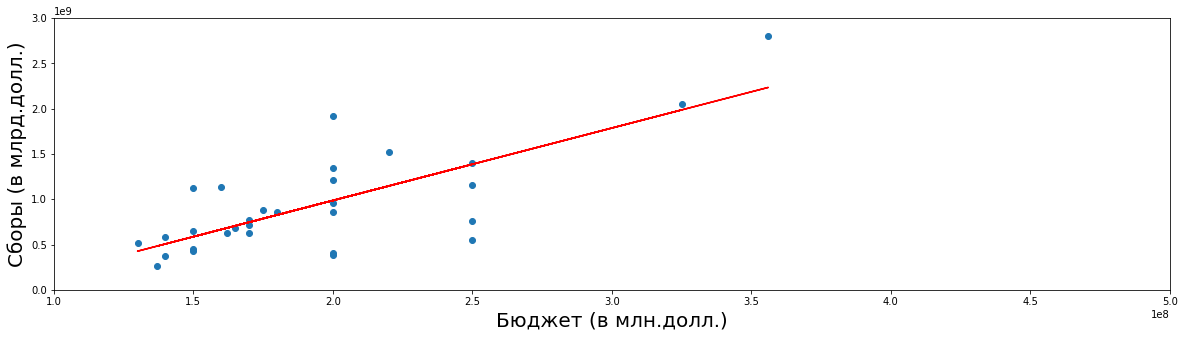

In [141]:
# ДОБАВИМ ЛИНИЮ НА НАШ ГРАФИК, ЧТОБЫ ПОКАЗАТЬ ПРЕДСКАЗАННЫЕ ЗНАЧЕНИЯ

plt.figure(figsize=(20,5))
plt.scatter(df_tables["Бюджет"], df_tables["Во всём мире"])

plt.plot(X, model.predict(X), color="red")

plt.xlim(100000000, 500_000_000)
plt.ylim(0, 3_000_000_000)
plt.xlabel("Бюджет (в млн.долл.)", fontsize=20)
plt.ylabel("Сборы (в млрд.долл.)", fontsize=20)

#### С ПОМОЩЬЮ ФУНКЦИИ "predict" МЫ МОЖЕМ ЗАДАТЬ </br>ЛЮБОЕ ЗНАЧЕНИЕ БЮДЖЕТА И ПОЛУЧИТЬ  ПОКАЗАТЕЛЬ СБОРОВ 

<div class="alert alert-block alert-success">
Давайте проверим сколько сборов принесёт фильм с бюджетом в 9/90/190 млн.долларов
</div>

In [142]:
print(model.predict([[90_000_000]]))

[1.06528613e+08]


In [143]:
# СДЕЛАЕМ ВЫВОД БОЛЕЕ НАГЛЯДНЫМ

print("{:_.2f}".format(float(model.predict([[9_000_000]]))))
print("{:_.2f}".format(float(model.predict([[90_000_000]]))))
print("{:_.2f}".format(float(model.predict([[190_000_000]]))))

-541_106_120.91
106_528_612.61
906_077_666.34


#### ТО ЕСТЬ ЕСЛИ МЫ ВЛОЖИМ
- **9 МЛН. ДОЛЛАРОВ**, ТО ОЖИДАЕМЫЕ СБОРЫ БУДУТ **-541 МЛН. ДОЛЛАРОВ**
- **90 МЛН. ДОЛЛАРОВ**, ТО ОЖИДАЕМЫЕ СБОРЫ БУДУТ **106.5 МЛН. ДОЛЛАРОВ**
- **190 МЛН. ДОЛЛАРОВ**, ТО ОЖИДАЕМЫЕ СБОРЫ БУДУТ **906 МЛН. ДОЛЛАРОВ**

# Таким образом, мы прошлись по всем пунктам нашего проекта. </br> Успешно его выполнили и применили все необходимые инструмены.